### For Google Colab users - Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # I tend to call my drive gdrive,if your name is Kelly you can kall it kellydrive as well ;)

### Importing the required packages

In [1]:
import os
import cv2
import shutil
import imutils
import snoop
# Uncomment below line, if you are using google-colab, since cv2.imshow should be substituted by cv2_imshow in colab
#from google.colab.patches import cv2_imshow 

In [ ]:
print(os.getcwd()) #current directory path
print(os.listdir()) # current directory contents, as we can see our google-drive has been successfully mounted at gdrive

### Work in a virtual environment with python==3.6 & virtualenvwrapper and virtualenv

In [ ]:
!pip install virtualenv 
!pip install virtualenvwrapper
# Also add the following line to your ~/.bashrc file < source /usr/local/bin/virtaulenvwrapper.sh > in case
# you have miniconda/anaconda installed see < PathToYourMiniconda3Directory/bin/virtualenvwrapper.sh >

In [ ]:
!mkvirtualenv --python=/usr/bin/python3.6 env
!workon env
# And then pip install the required packages, to exit virtualenv just type deactivate ['Enter']
# Using virtualenv and virtualenvwrapper to handle virtualenv can be great tools in your artillery, I
# recommend using virtualenv instead of venv (don't be mislead, it can/should be used with python3)

## Download the youtube video

#### Installing youtube-dl for downloading videos from youtube on linux

#### apt (i.e ubuntu) has a really outdated version of youtube-dl

In [ ]:
!apt-cache showpkg youtube-dl | grep "ubuntu18.04"

#### Use pip to install youtube-dl , youtube-dl has daily to weekly updates as can be seen from the date 2019.12.25

In [4]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.8MB 66kB/s eta 0:00:01
  Found existing installation: youtube-dl 2019.12.25
    Uninstalling youtube-dl-2019.12.25:
      Successfully uninstalled youtube-dl-2019.12.25


#### Downloading the news video in our current directory with youtube-dl
[Inside China’s child pop star factory - BBC News | December 27th ](https://www.youtube.com/watch?v=r_HCsmuSvXc)

In [7]:
!youtube-dl https://www.youtube.com/watch?v=r_HCsmuSvXc

[youtube] r_HCsmuSvXc: Downloading webpage
[youtube] r_HCsmuSvXc: Downloading video info webpage
[download] Destination: Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.f137.mp4
[download] 100% of 70.96MiB in 23:5895KiB/s ETA 00:00:30
[download] Destination: Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.f251.webm
[download] 100% of 6.85MiB in 02:1805KiB/s ETA 00:00
[ffmpeg] Merging formats into "Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.mkv"
Deleting original file Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.f137.mp4 (pass -k to keep)
Deleting original file Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.f251.webm (pass -k to keep)


#### The video will be present in our current directory as we can see below

In [ ]:
print(os.getcwd())
print(os.listdir())

### Extracting Frames from the video

#### Firstly, I'll create a new sub-directory to store the frames, named news_frames( all the frames) and nframes1s ( having 1 frame per second)

In [35]:
if os.path.exists('news_frames'):
    shutil.rmtree('news_frames')
if os.path.exists('nframes1s'):
    shutil.rmtree('nframes1s')
os.mkdir('news_frames')
os.mkdir('nframes1s')
print(os.listdir()) # news_frames has been created, as can be seen by the output of os.listdir()

['nframes1s', 'README.md', '.ipynb_checkpoints', 'Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.mkv', 'news_frames', 'env', '.git', 'text_detection_in_news.ipynb', '.gitignore']


### Video Info : Frame rate and duration

In [4]:
!ffmpeg -i Inside\ China’s\ child\ pop\ star\ factory\ -\ BBC\ News-r_HCsmuSvXc.mkv 2>&1 | sed -n "s/.*, \(.*\) tbr.*/\1/p"

25


In [5]:
!ffmpeg -i Inside\ China’s\ child\ pop\ star\ factory\ -\ BBC\ News-r_HCsmuSvXc.mkv 2>&1 | grep "Duration"

  Duration: 00:08:00.44, start: -0.007000, bitrate: 1357 kb/s


### Extraction of frames from news video to news_frames directory using ffmpeg

`1 frame per second extraction`

In [38]:
!ffmpeg -i Inside\ China’s\ child\ pop\ star\ factory\ -\ BBC\ News-r_HCsmuSvXc.mkv -vf fps=1 nframes1s/image_%04d.png -hide_banner

frame=  480 fps=7.2 q=-0.0 Lsize=N/A time=00:08:00.00 bitrate=N/A speed= 7.2x    
video:485682kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


`No. of frames and contents`

In [39]:
print(f'No. of frames saved in nframes1s: {len(os.listdir("nframes1s"))}')

No. of frames saved in nframes1s: 480


`Full Frames extraction : Relevant when each frame has high amount of data, such as in Indian news headlines scenario`

In [33]:
!ffmpeg -i Inside\ China’s\ child\ pop\ star\ factory\ -\ BBC\ News-r_HCsmuSvXc.mkv news_frames/image_%04d.png -hide_banner

In [40]:
print('Number of frames: {}'.format(len(os.listdir('news_frames')))) # Number of frames

Number of frames: 0


#### A sample frame from the video

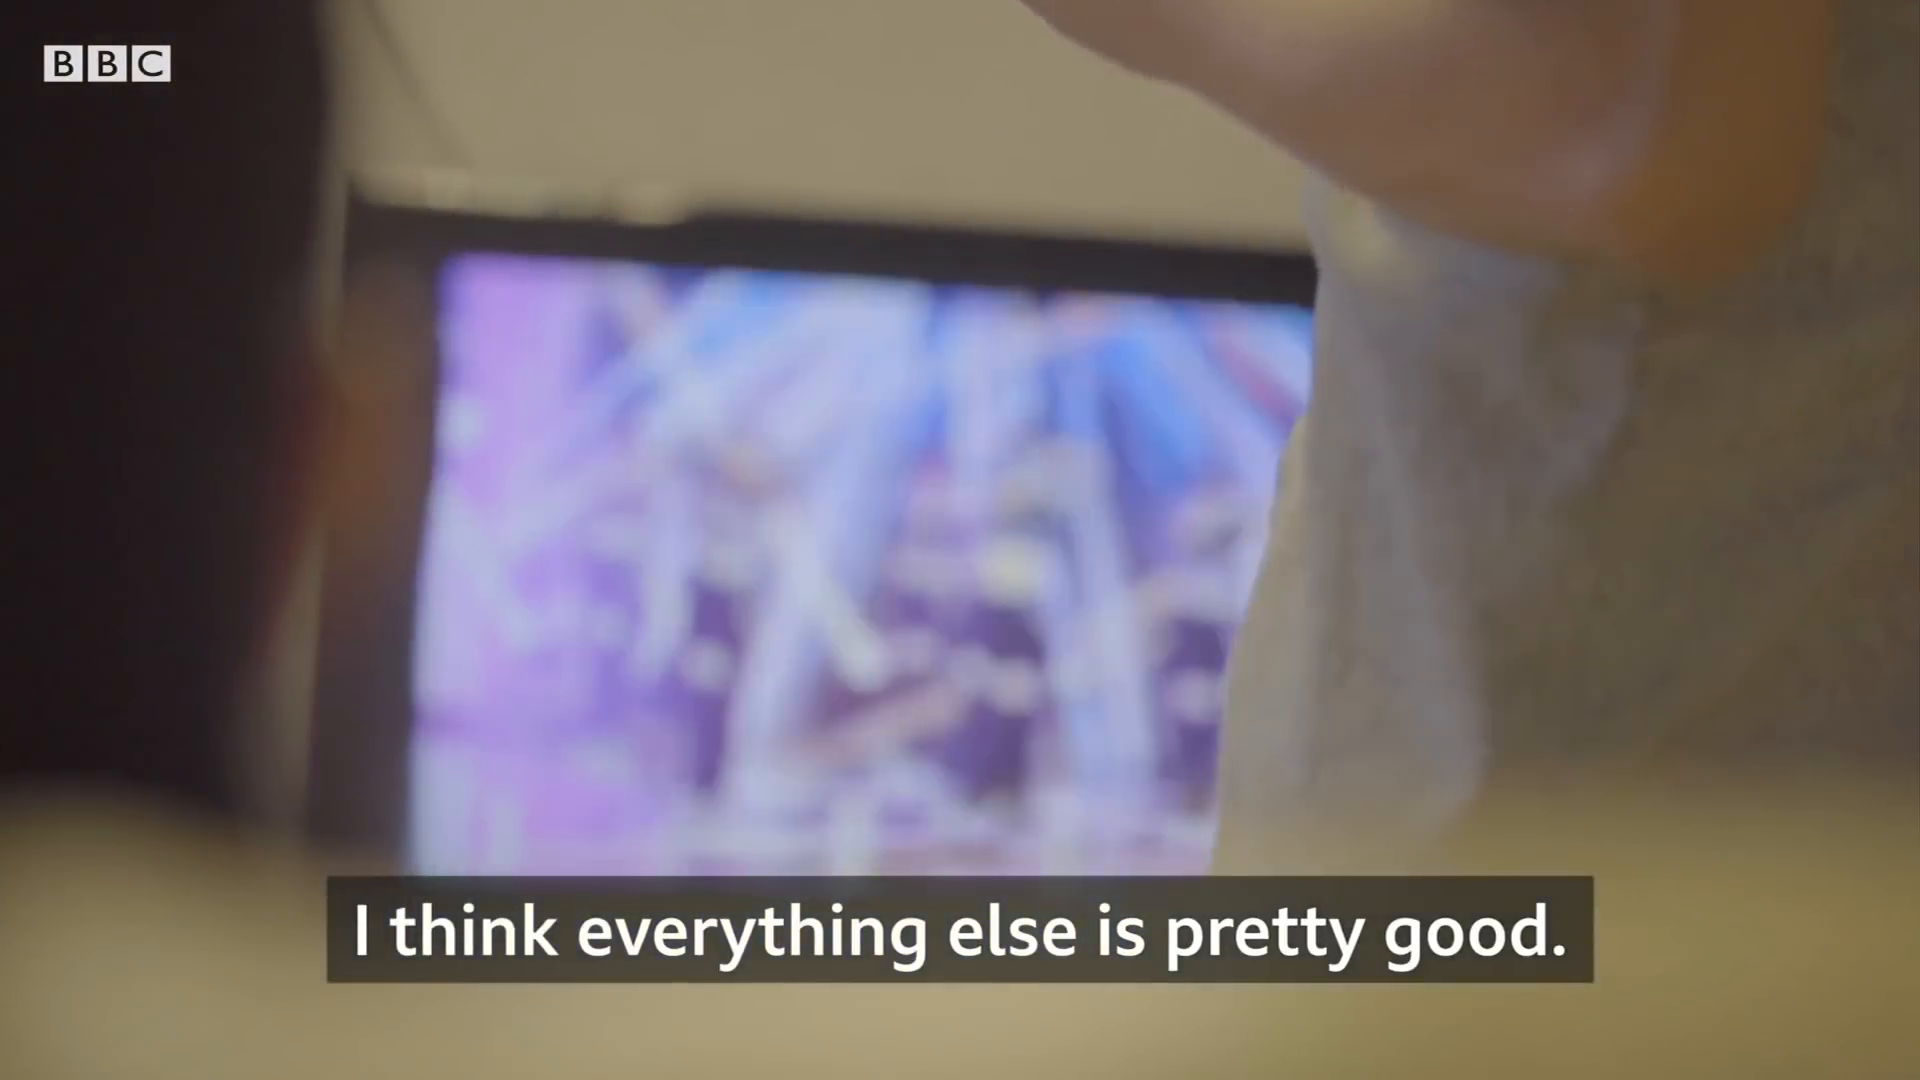

In [41]:
from IPython.display import Image
Image("nframes1s/image_0401.png")

### Deep Learning for Text Detection, code taken from Adrien Rosebrock's blog

#### [Pyimagesearch EAST text detector](https://www.pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/)

In [7]:
print(cv2.__version__)

4.1.2


In [ ]:
!pip install --upgrade imutils

In [46]:
print(os.listdir())

['nframes1s', 'README.md', '.ipynb_checkpoints', 'Inside China’s child pop star factory - BBC News-r_HCsmuSvXc.mkv', 'news_frames', 'env', '.git', 'text_detection_in_news.ipynb', 'requirements.txt', '.gitignore']


`Download the zip file containing the model file and python scripts for east text detection`

In [48]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-text-detection/opencv-text-detection.zip

--2019-12-29 19:57:12--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-text-detection/opencv-text-detection.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.220.136
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.220.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90424844 (86M) [application/zip]
Saving to: ‘opencv-text-detection.zip’

opencv-text-detecti 100%[===================>]  86.24M   154KB/s    in 10m 40s 

2019-12-29 20:07:54 (138 KB/s) - ‘opencv-text-detection.zip’ saved [90424844/90424844]



In [49]:
!unzip opencv-text-detection.zip

Archive:  opencv-text-detection.zip
   creating: opencv-text-detection/
  inflating: opencv-text-detection/frozen_east_text_detection.pb  
   creating: opencv-text-detection/images/
  inflating: opencv-text-detection/images/car_wash.png  
  inflating: opencv-text-detection/images/lebron_james.jpg  
  inflating: opencv-text-detection/images/sign.jpg  
  inflating: opencv-text-detection/text_detection.py  
  inflating: opencv-text-detection/text_detection_video.py  


In [ ]:
print(os.listdir('opencv-text-detection/'))

`Move files from opencv-text-detection to current working directory`

In [52]:
"""
os.chdir('opencv-text-detection')
for f in os.listdir():
  shutil.move(f, '..')

os.chdir('..')
"""

"\nos.chdir('opencv-text-detection')\nfor f in os.listdir():\n  shutil.move(f, '..')\n\nos.chdir('..')\n"

In [ ]:
print(os.getcwd()) 
print(os.listdir())

`Test Detection on a single image`

In [58]:
!python text_detection.py --image nframes1s/image_0401.png \
	--east frozen_east_text_detection.pb

[INFO] loading EAST text detector...
[INFO] text detection took 0.545179 seconds


### Python file to run text detection on directory of images - text_detection_wrapper.py


In [80]:
%%writefile text_detection_wrapper.py

## Creating text_detection_wrapper.py

import os
import argparse
from text_detection import detect_fun

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--directory", type=str,
	help="path to input directory")
ap.add_argument("-f", "--out", type=str,
   help='path to output directory')
ap.add_argument("-c", "--min-confidence", type=float, default=0.5,
	help="minimum probability required to inspect a region")
ap.add_argument( '-cr', "--crop", action='store_true')
args = vars(ap.parse_args())

for img in sorted(os.listdir(args['directory'])):
  detect_fun(os.path.join(args['directory'],img), args['out'], args['crop'], args['min_confidence'])

Overwriting text_detection_wrapper.py


#### 4 arguments can be given to text_detection_wrapper.py , input directory, output directory, min_confidence and <br> <font color=green>crop (whether to crop the detections or to draw bounding boxes on them and save the image)</font>

#### Currently extracts the detections from the frames and then saves them to results

In [ ]:
if os.path.exists('results'):
    shutil.rmtree('results/')
os.mkdir('results')
!python text_detection_wrapper.py --directory nframes1s/ --out results --min-confidence 0.5 -cr

In [20]:
%%writefile text_detection.py

# import the necessary packages
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2
import os
#import snoop
#from google.colab.patches import cv2_imshow (If working on google-colab)
import matplotlib.pyplot as plt

#@snoop
def detect_fun(image, img_dir, crop=False, conf=0.5):
    args = {}
    args['image'] = image
    args['east'] = 'frozen_east_text_detection.pb'
    args['min_confidence'] = conf
    args['width'] = 320
    args['height'] = 320

    # load the input image and grab the image dimensions
    image = cv2.imread(args["image"])
    orig = image.copy()
    (H, W) = image.shape[:2]

    # set the new width and height and then determine the ratio in change
    # for both the width and height
    (newW, newH) = (args["width"], args["height"])
    rW = W / float(newW)
    rH = H / float(newH)

    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    (H, W) = image.shape[:2]

    # define the two output layer names for the EAST detector model that
    # we are interested -- the first is the output probabilities and the
    # second can be used to derive the bounding box coordinates of text
    layerNames = [
      "feature_fusion/Conv_7/Sigmoid",
      "feature_fusion/concat_3"]

    # load the pre-trained EAST text detector
    print("[INFO] loading EAST text detector...")
    net = cv2.dnn.readNet(args["east"])

    # construct a blob from the image and then perform a forward pass of
    # the model to obtain the two output layer sets
    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
      (123.68, 116.78, 103.94), swapRB=True, crop=False)
    start = time.time()
    net.setInput(blob)
    (scores, geometry) = net.forward(layerNames)
    end = time.time()

    # show timing information on text prediction
    print("[INFO] text detection took {:.6f} seconds".format(end - start))

    # grab the number of rows and columns from the scores volume, then
    # initialize our set of bounding box rectangles and corresponding
    # confidence scores
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []

    # loop over the number of rows
    for y in range(0, numRows):
      # extract the scores (probabilities), followed by the geometrical
      # data used to derive potential bounding box coordinates that
      # surround text
      scoresData = scores[0, 0, y]
      xData0 = geometry[0, 0, y]
      xData1 = geometry[0, 1, y]
      xData2 = geometry[0, 2, y]
      xData3 = geometry[0, 3, y]
      anglesData = geometry[0, 4, y]


    # loop over the number of columns
      for x in range(0, numCols):
        # if our score does not have sufficient probability, ignore it
        if scoresData[x] < args["min_confidence"]:
          continue

        # compute the offset factor as our resulting feature maps will
        # be 4x smaller than the input image
        (offsetX, offsetY) = (x * 4.0, y * 4.0)

        # extract the rotation angle for the prediction and then
        # compute the sin and cosine
        angle = anglesData[x]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # use the geometry volume to derive the width and height of
        # the bounding box
        h = xData0[x] + xData2[x]
        w = xData1[x] + xData3[x]

        # compute both the starting and ending (x, y)-coordinates for
        # the text prediction bounding box
        endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
        endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
        startX = int(endX - w)
        startY = int(endY - h)

        # add the bounding box coordinates and probability score to
        # our respective lists
        rects.append((startX, startY, endX, endY))
        confidences.append(scoresData[x])


      # apply non-maxima suppression to suppress weak, overlapping bounding
    # boxes
    boxes = non_max_suppression(np.array(rects), probs=confidences)
    
    if not os.path.exists(img_dir):
      os.mkdir(img_dir)

    # loop over the bounding boxes
    for (i ,(startX, startY, endX, endY)) in enumerate(boxes):
      # scale the bounding box coordinates based on the respective
      # ratios
      startX = int(startX * rW)
      startY = int(startY * rH)
      endX = int(endX * rW)
      endY = int(endY * rH)
      
      if crop == True:
        crop_img = orig[startY: endY, startX:endX]
        cv2.imwrite(os.path.join(img_dir, args['image'].split('/')[1][:-4] + '_' + str(i) + '.png'), crop_img)
        print('Writing image to : {}'.format(os.path.join(img_dir, args['image'].split('/')[1][:-4] + '_' + str(i) + '.png')))
      else:
      # draw the bounding box on the image
        cv2.rectangle(orig, (startX, startY), (endX, endY), (255, 0, 0), 4)

      #cv2_imshow(crop_img)

    # show the output image
    #plt.imshow(orig)
    #print(args['image'].split('/'))
    if not crop:
      #print(f"Path is {os.path.join(img_dir, args['image'].split('/')[1])}")
      if not cv2.imwrite(os.path.join(img_dir, args['image'].split('/')[1]), orig):
            print(os.path.join(img_dir, args['image'].split('/')[1]))
      print('Writing image to : {}'.format(os.path.join(img_dir, args['image'].split('/')[1])))

Overwriting text_detection.py


#### To create video file for Indian news headlines video actual frame rate would be better, but for a video from bbc, 1 frames per second will do just fine

In [ ]:
if os.path.exists('detections'):
    shutil.rmtree('detections/')
!python text_detection_wrapper.py --directory nframes1s --out detections

#### Video from frames

In [ ]:
!ffmpeg -framerate 1 -i detections/image_%04d.png bbc_pop_idol_detections.mp4 

#### CRNN for text - recognition

##### Using Model by Bai-shang
<font color=blue>[CRNN bai-shang](https://github.com/bai-shang/crnn_ctc_ocr.Tensorflow)</font>

In [16]:
!git clone https://github.com/bai-shang/crnn_ctc_ocr.Tensorflow.git

Cloning into 'crnn_ctc_ocr.Tensorflow'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 84 (delta 33), reused 17 (delta 4), pack-reused 20
Unpacking objects: 100% (84/84), done.


In [ ]:
os.chdir('crnn_ctc_ocr.Tensorflow/')
print(os.getcwd())
!export PYTHONPATH=$PYTHONPATH:./

#### Download the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [23]:
!wget https://drive.google.com/uc?export=download&confirm=5JEV&id=1A3V7o3SKSiL3IHcTqc1jP4w58DuC8F9o

In [24]:
!unzip ../bs_synth90k_model.zip

Archive:  ../bs_synth90k_model.zip
   creating: bs_synth90k_model/
  inflating: bs_synth90k_model/checkpoint  
   creating: __MACOSX/
   creating: __MACOSX/bs_synth90k_model/
  inflating: __MACOSX/bs_synth90k_model/._checkpoint  
  inflating: bs_synth90k_model/crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.data-00000-of-00001  
  inflating: __MACOSX/bs_synth90k_model/._crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.data-00000-of-00001  
  inflating: bs_synth90k_model/crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.index  
  inflating: __MACOSX/bs_synth90k_model/._crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.index  
  inflating: bs_synth90k_model/crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.meta  
  inflating: __MACOSX/bs_synth90k_model/._crnn_ctc_ocr_2018-11-16-03-14-19.ckpt-19999.meta  
  inflating: __MACOSX/._bs_synth90k_model  


In [8]:
os.listdir()

['char_map',
 'test_data',
 '__MACOSX',
 'README.md',
 'crnn_model',
 'tools',
 'bs_synth90k_model',
 '.git',
 'data',
 'Arch.jpg',
 'requirements.txt',
 'text_recognition.txt']

#### Create image_list.txt for our data

In [7]:
with open('../image_list.txt', 'w') as f:
  for img in os.listdir('../results'):
    f.write(img + '\n')

#### Modifying tools/inference_crnn_ctc.py

In [9]:
%%writefile tools/inference_crnn_ctc.py


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import os
import time
import json
import sys
sys.path.append('/home/valuepitch/.Private/text_recognition_in_news_videos/crnn_ctc_ocr.Tensorflow')



import tensorflow as tf

import cv2
import numpy as np

from crnn_model import model

os.environ["CUDA_VISIBLE_DEVICES"]=""

_IMAGE_HEIGHT = 32

# ------------------------------------Basic prameters------------------------------------
tf.app.flags.DEFINE_string(
    'image_dir', './test_data/images/', 'Path to the directory containing images.')

tf.app.flags.DEFINE_string(
    'image_list', './test_data/image_list.txt', 'Path to the images list txt file.')

tf.app.flags.DEFINE_string(
    'model_dir', './model/', 'Base directory for the model.')

# ------------------------------------LSTM prameters------------------------------------
tf.app.flags.DEFINE_integer(
    'lstm_hidden_layers', 2, 'The number of stacked LSTM cell.')

tf.app.flags.DEFINE_integer(
    'lstm_hidden_uints', 256, 'The number of units in each LSTM cell')

# ------------------------------------Char dictionary------------------------------------
tf.app.flags.DEFINE_string(
    'char_map_json_file', './char_map/char_map.json', 'Path to char map json file')

FLAGS = tf.app.flags.FLAGS

def _sparse_matrix_to_list(sparse_matrix, char_map_dict=None):
    indices = sparse_matrix.indices
    values = sparse_matrix.values
    dense_shape = sparse_matrix.dense_shape

    # the last index in sparse_matrix is ctc blanck note
    if char_map_dict is None:
        char_map_dict = json.load(open(FLAGS.char_map_json_file, 'r'))
    assert(isinstance(char_map_dict, dict) and 'char_map_dict is not a dict')    

    dense_matrix =  len(char_map_dict.keys()) * np.ones(dense_shape, dtype=np.int32)
    for i, indice in enumerate(indices):
        dense_matrix[indice[0], indice[1]] = values[i]
    string_list = []
    for row in dense_matrix:
        string = []
        for val in row:
            string.append(_int_to_string(val, char_map_dict))
        string_list.append(''.join(s for s in string if s != '*'))
    return string_list

def _int_to_string(value, char_map_dict=None):
    if char_map_dict is None:
        char_map_dict = json.load(open(FLAGS.char_map_json_file, 'r'))
    assert(isinstance(char_map_dict, dict) and 'char_map_dict is not a dict')
    
    for key in char_map_dict.keys():
        if char_map_dict[key] == int(value):
            return str(key)
        elif len(char_map_dict.keys()) == int(value):
            return "" 
    raise ValueError('char map dict not has {:d} value. convert index to char failed.'.format(value))

def _inference_crnn_ctc():
    input_image = tf.placeholder(dtype=tf.float32, shape=[1, _IMAGE_HEIGHT, None, 3])
    char_map_dict = json.load(open(FLAGS.char_map_json_file, 'r'))
    # initialise the net model
    crnn_net = model.CRNNCTCNetwork(phase='test',
                                    hidden_num=FLAGS.lstm_hidden_uints,
                                    layers_num=FLAGS.lstm_hidden_layers,
                                    num_classes=len(char_map_dict.keys()) + 1)

    with tf.variable_scope('CRNN_CTC', reuse=False):
        net_out = crnn_net.build_network(input_image)

    input_sequence_length = tf.placeholder(tf.int32, shape=[1], name='input_sequence_length')

    ctc_decoded, ct_log_prob = tf.nn.ctc_beam_search_decoder(net_out, input_sequence_length, merge_repeated=True)

    with open(FLAGS.image_list, 'r') as fd:
       image_names = [line.strip() for line in fd.readlines()]

    # set checkpoint saver
    saver = tf.train.Saver()
    save_path = tf.train.latest_checkpoint(FLAGS.model_dir)
    
    if os.path.exists('./text_recognition.txt'):
      os.remove('text_recognition.txt')
    

    with tf.Session() as sess:
        # restore all variables
        saver.restore(sess=sess, save_path=save_path)
        list1 = []
        x = 1
        for image_name in sorted(image_names):
            try:
                image_path = os.path.join(FLAGS.image_dir, image_name)
                image = cv2.imread(image_path)
                try:
                  h, w, c = image.shape
                  height = _IMAGE_HEIGHT
                  width = int(w * height / h)
                  image = cv2.resize(image, (width, height))
                  image = np.expand_dims(image, axis=0)
                  image = np.array(image, dtype=np.float32)
                  seq_len = np.array([width / 4], dtype=np.int32)

                  preds = sess.run(ctc_decoded, feed_dict={input_image:image, input_sequence_length:seq_len})

                  preds = _sparse_matrix_to_list(preds[0], char_map_dict)


                  print("here")
                  with open('text_recognition.txt', 'a') as f:
                    if int(image_name[6:10]) == x:
                      list1.append(preds[0])
                    else:
                      #import pdb ; pdb.set_trace()
                      f.write('frame' + str(x) + ':' + ' ' + ' '.join(list1) + '\n')
                      list1 = []
                      list1.append(preds[0])
                      x+=1

                  print('Predict {:s} image as: {:s}'.format(image_name, preds[0]))
                except AttributeError:
                  continue
            except:
                pass
        
def main(unused_argv):
    _inference_crnn_ctc()

if __name__ == '__main__':
    tf.app.run() 

Overwriting tools/inference_crnn_ctc.py


#### Output from Pretrained Model

In [ ]:
!python tools/inference_crnn_ctc.py \
  --image_dir ../results/ --image_list ../image_list.txt \
  --model_dir bs_synth90k_model/ 2>/dev/null

In [ ]:
!cat text_recognition.txt

In [20]:
print(os.listdir())

['char_map', 'test_data', '__MACOSX', 'README.md', 'crnn_model', 'tools', 'bs_synth90k_model', '.git', 'data', 'Arch.jpg', 'requirements.txt']


#### The output isn't as good as we would have liked it to be : Some solutions can be to :
1) Add training data, we can do this by using a textgenerator, which I'm going to show how to do.
2) Some text detected like the word "BBC" is in every frame and should obviously be removed, since it's the channels name alone.
3) As, we can see the words are in white color, so we can try inverting the color, since the training data might not be trained on such examples at all